# OCORRÊNCIAS AERONÁUTICAS NA AVIAÇÃO CIVIL BRASILEIRA

In [1]:
# Carregando as bibliotecas que serão utilizadas no processo de tratamento dos dados e EDA

import pandas as pd
import numpy as np

from google.colab import files
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import files


In [2]:
uploaded = files.upload()

Saving aeronave.csv to aeronave (4).csv
Saving fator_contribuinte.csv to fator_contribuinte (4).csv
Saving ocorrencia.csv to ocorrencia (4).csv
Saving ocorrencia_tipo.csv to ocorrencia_tipo (4).csv
Saving recomendacao.csv to recomendacao (4).csv


In [3]:
df1 = pd.read_csv('aeronave.csv', sep=";")
df2 = pd.read_csv('fator_contribuinte.csv', sep=";")
df3 = pd.read_csv('ocorrencia.csv', sep=";")
df4 = pd.read_csv('ocorrencia_tipo.csv', sep=";")
df5 = pd.read_csv('recomendacao.csv', sep=";")

In [4]:
# Verificando o formato de cada um dos CSVs importados
df_list = [df1, df2, df3, df4, df5]
shape_df = [x.shape for x in df_list]
print(shape_df)

[(5235, 23), (3464, 5), (5167, 22), (5347, 4), (1197, 9)]


In [5]:
df1.head()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,45331,PRTKB,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0
1,45332,PTUDD,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,SUBSTANCIAL,0
2,45333,PTGOO,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0
3,45334,PRMHX,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,REGULAR,LEVE,0
4,45390,PTUEW,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0


In [6]:
df2.head()

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,45331,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,45331,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,45331,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
3,45331,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
4,45331,COMUNICAÇÃO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO


In [7]:
df3.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,05/01/2012,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,...,06/01/2012,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,...,06/01/2012,17:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,...,06/01/2012,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO


In [8]:
df4.head()

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
1,45332,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G
2,45333,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
3,45334,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
4,45390,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT


In [9]:
df5.head()

,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,45331,A-582/CENIPA/2014 - 01,2016-07-29,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,45331,A-582/CENIPA/2014 - 02,2016-07-29,2016-08-25,2016-12-20,Atuar junto à Administração do Aeroporto Inter...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,45331,A-582/CENIPA/2014 - 03,2016-07-29,2016-08-25,NaN,Orientar as suas organizações subordinadas em ...,AGUARDANDO RESPOSTA,DECEA,DEPARTAMENTO DE CONTROLE DE ESPAÇO AÉREO
3,45392,A-032/CENIPA/2014 - RSV 001,2014-04-07,2015-04-14,2015-08-21,Divulgar aos operadores de helicópteros vincul...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,45392,A-032/CENIPA/2014 - RSV 002,2014-04-07,2015-04-14,2015-08-17,Tendo em vista os fatos levantados nesta inves...,NÃO CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


In [10]:
# Juntando todos os datasets e transformando em um único, em cima da feature key 'codigo_ocorrencia'
df = pd.merge(df3, df1, on='codigo_ocorrencia2')
df = pd.merge(df, df2, on='codigo_ocorrencia3')
df = pd.merge(df, df4, on='codigo_ocorrencia1')
df = pd.merge(df, df5, on='codigo_ocorrencia4')

In [11]:
# setando para que sejam mostradas todas as colunas do dataset
pd.set_option('display.max_columns', None)
df.sample(10)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
2905,53265,53265,53265,53265,53265,ACIDENTE,-4.5577777778,-60.7861111111,PACARAIMA,RR,BRASIL,SDMM,05/05/2015,16:05:00,SIM,FINALIZADA,A-067/CENIPA/2015,SIM,2016-10-28,2,1,SIM,PTKVW,***,AVIÃO,CESSNA AIRCRAFT,U206F,C206,PISTÃO,MONOMOTOR,1633,1633,6.0,1975.0,BRASIL,BRASIL,AVIÃO,TÁXI AÉREO,PEDRA PRETA,LAGO VERDE,POUSO,TÁXI AÉREO,SUBSTANCIAL,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,POUSO LONGO,EXCURSÃO DE PISTA | POUSO LONGO,RE,A-067/CENIPA/2015 - 01,2016-10-28,2016-12-14,2017-02-13,Realizar gestões junto ao Operador visando rev...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1490,49593,49593,49593,49593,49593,ACIDENTE,-3.6625,-44.5380555556,MATÕES DO NORTE,MA,BRASIL,****,30/08/2013,15:55:00,SIM,FINALIZADA,A-154/CENIPA/2013,SIM,2019-04-08,3,1,NÃO,PTHUE,***,HELICÓPTERO,BELL HELICOPTER,206B,B06,TURBOEIXO,MONOMOTOR,1451,1451,5.0,1988.0,BRASIL,BRASIL,HELICÓPTERO,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,TÁXI AÉREO,SUBSTANCIAL,0,MANUTENÇÃO DA AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,A-154/CENIPA/2013-03,2019-04-08,2019-04-08,NaN,DIVULGAR OS ENSINAMENTOS COLHIDOS NA PRESENTE ...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4337,77602,77602,77602,77602,77602,ACIDENTE,-30.730.555.556,-600.177.777.77,MANAUS,AM,BRASIL,SWFN,22/08/2017,21:30:00,SIM,FINALIZADA,A-107/CENIPA/2017,SIM,2018-06-25,1,1,SIM,PTLDV,***,AVIÃO,CESSNA AIRCRAFT,P210N,P210,PISTÃO,MONOMOTOR,1814,1814,6.0,0.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FLORES,FLORES,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE,A-107/CENIPA/2017 - 01,2018-06-25,2018-07-19,2018-07-31,Divulgar os ensinamentos colhidos na presente ...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
495,45934,45934,45934,45934,45934,ACIDENTE,-2.5202777778,-44.1372222222,PAÇO DO LUMIAR,MA,BRASIL,SJHR,14/06/2012,19:40:00,SIM,FINALIZADA,A-036/CENIPA/2013,SIM,2013-08-22,2,1,NÃO,PTYCN,***,HELICÓPTERO,BELL HELICOPTER,206B,B06,TURBOEIXO,MONOMOTOR,1451,1451,5.0,1973.0,BRASIL,BRASIL,HELICÓPTERO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,OPERAÇÃO DE SOLO,PRIVADA,SUBSTANCIAL,1,PESSOAL DE APOIO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,OUTROS,OUTROS,OTHR,A-036/CENIPA/2013-RSV002,2013-08-22,2013-11-05,2014-01-15,Divulgar o conteúdo do presente relatório dura...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
3,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-0

In [12]:
# Verificando se as colunas 'aeronave_pais_fabricante' e 'aeronave_pais_registro' são idênticas
df['aeronave_pais_fabricante'].equals(df['aeronave_pais_registro'])


True

In [13]:
# Verificando se as colunas 'aeronave_pmd' e 'aeronave_pmd_categoria' são idênticas
df['aeronave_pmd'].equals(df['aeronave_pmd_categoria'])

True

In [14]:
# Eliminando colunas que não serão utilizadas na análise
df = df.drop(['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_latitude',
              'ocorrencia_longitude', 'ocorrencia_aerodromo', 'aeronave_tipo_icao', 'aeronave_pmd_categoria',
              'aeronave_matricula', 'aeronave_assentos', 'aeronave_pais_registro', 'divulgacao_relatorio_numero',
              'divulgacao_relatorio_publicado', 'investigacao_aeronave_liberada', 'aeronave_operador_categoria',
              'aeronave_ano_fabricacao', 'divulgacao_dia_publicacao', 'recomendacao_dia_feedback', 
              'recomendacao_destinatario_sigla', 'recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento'], axis=1)



---



In [15]:
df.sample(10)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,recomendacao_numero,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario
3193,53358,INCIDENTE GRAVE,SANTA INÊS,MA,BRASIL,07/07/2015,20:00:00,FINALIZADA,3,1,NÃO,HELICÓPTERO,BELL HELICOPTER,206L-4,TURBOEIXO,MONOMOTOR,2018,BRASIL,HELICÓPTERO,ADMINISTRAÇÃO INDIRETA,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,PRIVADA,SUBSTANCIAL,0,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,IG-097/CENIPA/2015 - 02,RECOMENDAR AO IBAMA A ELABORAçãO DE UM MANUAL ...,CUMPRIDA,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
765,50831,ACIDENTE,ACREÚNA,GO,BRASIL,09/09/2012,20:00:00,FINALIZADA,1,1,NÃO,AVIÃO,CESSNA AIRCRAFT,172N,PISTÃO,MONOMOTOR,1043,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,DESTRUÍDA,4,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I,A-044/CENIPA/2014 - RSV 001,Divulgar os ensinamentos decorrentes desse aci...,CUMPRIDA DE FORMA ALTERNATIVA,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2700,52651,ACIDENTE,RORAINÓPOLIS,RR,BRASIL,26/10/2014,17:30:00,FINALIZADA,1,1,NÃO,AVIÃO,CESSNA AIRCRAFT,U206G,PISTÃO,MONOMOTOR,1633,BRASIL,AVIÃO,ADMINISTRAÇÃO DIRETA,FORA DE AERODROMO,ATLAS BRASIL CANTANHEDE,CRUZEIRO,NÃO REGULAR,NENHUM,0,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL,A-177/CENIPA/2014 - 01,Realizar gestões junto ao operador da aeronave...,NÃO CUMPRIDA,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4953,77781,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,BRASIL,30/03/2018,12:50:00,FINALIZADA,2,2,NÃO,ULTRALEVE,***,P92-S ECHO,PISTÃO,MONOMOTOR,550,BRASIL,ULTRALEVE,EXPERIMENTAL,***,***,CRUZEIRO,PRIVADA,LEVE,0,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,COLISÃO DE AERONAVES EM VOO,PERDA DE SEPARAÇÃO / COLISÃO EM VOO | COLISÃO ...,MAC,IG-058/CENIPA/2018 - 01,"Atuar junto aos representantes do APP-RJ, da T...",AGUARDANDO RESPOSTA,DEPARTAMENTO DE CONTROLE DE ESPAÇO AÉREO
773,46356,ACIDENTE,TAPIRAMUTÁ,BA,BRASIL,22/09/2012,15:50:00,FINALIZADA,3,1,NÃO,AVIÃO,CESSNA AIRCRAFT,170A,PISTÃO,MONOMOTOR,998,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,ESPECIALIZADA,SUBSTANCIAL,0,CONDIÇÕES METEOROLÓGICAS ADVERSAS,ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL,***,FATOR OPERACIONAL,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I,A-173/CENIPA/2013 - RSV 001,Assegurar-se da adequação do planejamento gere...,NÃO CUMPRIDA,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
3847,65198,INCIDENTE GRAVE,CACOAL,RO,BRASIL,13/05/2016,19:19:00,FINALIZADA,7,1,NÃO,HELICÓPTERO,BELL HELICOPTER,206L-4,TURBOEIXO,MONOMOTOR,2018,BRASIL,HELICÓPTERO,ADMINISTRAÇÃO INDIRETA,CACOAL,CACOAL,APROXIMAÇÃO FINAL,ESPECIALIZADA,LEVE,0,PROCESSOS ORGANIZACIONAIS,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,IG-084/CENIPA/2016 - 07,"Atuar junto ao IBAMA, a fim de reavaliar a ade...",CUMPRIDA,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2107,51083,INCIDENTE,GOIÂNIA,GO,BRASIL,12/04/2014,15:59:00,FINALIZADA,6,1,NÃO,AVIÃO,AIRBUS INDUSTRIE,A320-214,JATO,BIMOTOR,77000,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,REGULAR,LEVE,0

In [16]:
df.nunique()

codigo_ocorrencia               561
ocorrencia_classificacao          3
ocorrencia_cidade               344
ocorrencia_uf                    27
ocorrencia_pais                   1
ocorrencia_dia                  511
ocorrencia_hora                 230
investigacao_status               1
total_recomendacoes              12
total_aeronaves_envolvidas        2
ocorrencia_saida_pista            2
aeronave_tipo_veiculo             6
aeronave_fabricante              46
aeronave_modelo                 205
aeronave_motor_tipo               6
aeronave_motor_quantidade         4
aeronave_pmd                    150
aeronave_pais_fabricante          7
aeronave_registro_categoria       6
aeronave_registro_segmento       12
aeronave_voo_origem             219
aeronave_voo_destino            224
aeronave_fase_operacao           23
aeronave_tipo_operacao           10
aeronave_nivel_dano               5
aeronave_fatalidades_total       10
fator_nome                       69
fator_aspecto               

In [17]:
df.isnull().sum()

codigo_ocorrencia              0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  0
ocorrencia_pais                0
ocorrencia_dia                 0
ocorrencia_hora                0
investigacao_status            0
total_recomendacoes            0
total_aeronaves_envolvidas     0
ocorrencia_saida_pista         0
aeronave_tipo_veiculo          0
aeronave_fabricante            0
aeronave_modelo                0
aeronave_motor_tipo            0
aeronave_motor_quantidade      0
aeronave_pmd                   0
aeronave_pais_fabricante       0
aeronave_registro_categoria    0
aeronave_registro_segmento     0
aeronave_voo_origem            0
aeronave_voo_destino           0
aeronave_fase_operacao         0
aeronave_tipo_operacao         0
aeronave_nivel_dano            0
aeronave_fatalidades_total     0
fator_nome                     0
fator_aspecto                  0
fator_condicionante            0
fator_area                     0
ocorrencia

In [18]:
# Eliminando as únicas duas linhas contendo NAN na coluna 'recomendacao_conteudo'
df.dropna(subset = ['recomendacao_conteudo'], inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6685 entries, 0 to 6686
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   codigo_ocorrencia            6685 non-null   int64 
 1   ocorrencia_classificacao     6685 non-null   object
 2   ocorrencia_cidade            6685 non-null   object
 3   ocorrencia_uf                6685 non-null   object
 4   ocorrencia_pais              6685 non-null   object
 5   ocorrencia_dia               6685 non-null   object
 6   ocorrencia_hora              6685 non-null   object
 7   investigacao_status          6685 non-null   object
 8   total_recomendacoes          6685 non-null   int64 
 9   total_aeronaves_envolvidas   6685 non-null   int64 
 10  ocorrencia_saida_pista       6685 non-null   object
 11  aeronave_tipo_veiculo        6685 non-null   object
 12  aeronave_fabricante          6685 non-null   object
 13  aeronave_modelo              6685

In [20]:
# Verificando o formato de hora e data
df_dt = df[['ocorrencia_dia', 'ocorrencia_hora']]
print(df_dt)

     ocorrencia_dia ocorrencia_hora
0        06/01/2012        13:44:00
1        06/01/2012        13:44:00
2        06/01/2012        13:44:00
3        06/01/2012        13:44:00
4        06/01/2012        13:44:00
...             ...             ...
6682     06/12/2020        13:15:00
6683     06/12/2020        13:15:00
6684     06/12/2020        13:15:00
6685     06/05/2021        14:57:00
6686     06/05/2021        14:57:00

[6685 rows x 2 columns]


In [21]:
# Convertendo colunas contendo data e hora para tipo datetime
cols = ['ocorrencia_dia', 'ocorrencia_hora']
df[cols] = df[cols].apply(pd.to_datetime)


In [22]:
# Criando a coluna 'ANO' para futuras análise e convertendo para o formato correto
df['ocorrencia_ano'] = df['ocorrencia_dia'].dt.year

In [23]:
df.describe()

,codigo_ocorrencia,total_recomendacoes,total_aeronaves_envolvidas,aeronave_pmd,aeronave_fatalidades_total,ocorrencia_ano
count,6685.000000,6685.000000,6685.000000,6685.000000,6685.000000,6685.000000
mean,61489.936874,4.116530,1.079282,14486.465071,1.012565,2015.473598
std,13312.837404,2.993365,0.270199,42793.684329,1.958766,2.522686
min,45331.000000,1.000000,1.000000,0.000000,0.000000,2012.000000
25%,50238.000000,2.000000,1.000000,1315.000000,0.000000,2013.000000
50%,53488.000000,3.000000,1.000000,2100.000000,0.000000,2015.000000
75%,77803.000000,6.000000,1.000000,4750.000000,1.000000,2018.000000
max,80258.000000,13.000000,2.000000,346544.000000,10.000000,2021.000000




---



# ANÁLISE EXPLORATÓRIA

## Introdução

### inserir intro

## Classificação das Ocorrências

### Para iniciarmos a análise, primeiro precisamos compreender como se classificam os tipos de ocorrência: 

In [24]:
#sns.set_theme(palette="Paired", rc={'figure.figsize':(12,6)})

In [25]:
def show_count():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## Ocorrências por ano/tipos de ocorrencias (tipos de ocorrencia)

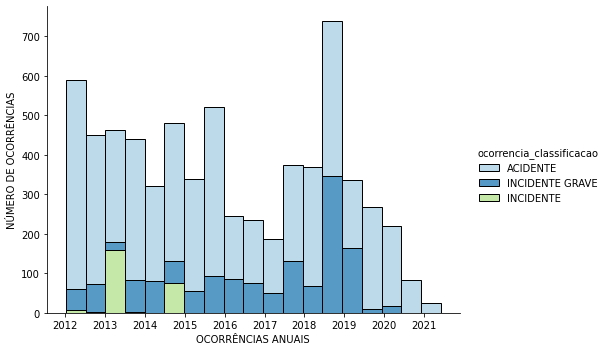

In [26]:
ax = sns.displot(data=df, x = 'ocorrencia_dia', hue = 'ocorrencia_classificacao', palette = 'Paired', multiple = "stack", aspect=4/3)
ax.set_axis_labels('OCORRÊNCIAS ANUAIS', 'NÚMERO DE OCORRÊNCIAS')




### Podemos notar que as ocorrências se dividem em três grupos - **Acidente, Incidente e Incidente Grave**. Percebe-se que a grande maioria se configura como **Acidente**, ou seja, existe algum tipo de lesão à passageiro(s) e/ou funcionário(s).

### Existe uma queda considerável de ocorrências (principalmente se tratado de Incidente Grave) à partir do meio início de 2020. Um provável motivo seja a pandemia que se iniciou no mesmo período.

## Quais são os principais fatores contribuintes nas ocorrências?





### Considerando todos os tipos de ocorrência, uma questão que surge é quais são os motivos diagnosticados como causadores. Iremos analisar as causa e suas respectivas frequências abaixo.

Text(0, 0.5, 'TIPO DE OCORRÊNCIA')

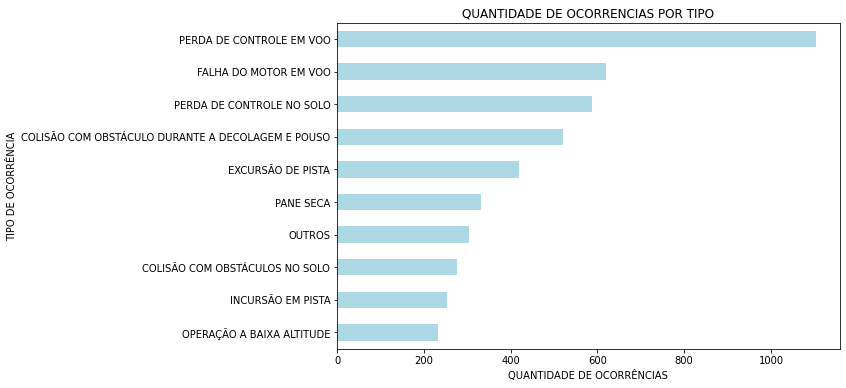

In [27]:
ax = df['ocorrencia_tipo'].value_counts(ascending = True).tail(10).plot(kind='barh', color='lightblue', figsize=(9, 6))
plt.title('QUANTIDADE DE OCORRENCIAS POR TIPO')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS')
plt.ylabel('TIPO DE OCORRÊNCIA')



### Nota-se que os principais fatores causadores ocorrem em pleno ar. Temos como principal fator a **perda de controle em vôo**, seguida por **falha do motor em vôo**. É necessário destacar que as falhas pode acontecer devido tanto à erros humanos quanto falhas nos equipamentos.

## Outro ponto importante é analisar qual etapa do vôo ocorrem mais problemas. Seria no ar ou já em terra firme?

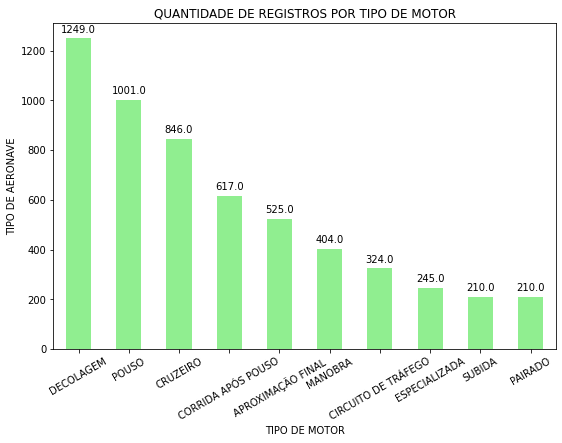

In [28]:
#ax = sns.barplot(data = df, x = 'aeronave_fase_operacao', y = 'ocorrencia_tipo')

ax = df['aeronave_fase_operacao'].value_counts().head(10).plot(kind='bar', figsize=(9, 6), color = 'lightgreen')
ax.set_title('QUANTIDADE DE REGISTROS POR TIPO DE MOTOR')
ax.set_xlabel('TIPO DE MOTOR')
ax.set_ylabel("TIPO DE AERONAVE")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
show_count()


### Temos como as principais fases a fase de **Decolagem** e **Pouso**. Conclui-se que a maioria das ocorrências registradas acontecem enquanto o avião está em contato com o solo, o que justifica um certo equilibrío entre ocorrências no ar e em terra (levando em conta a quantidade de tipos de fatores causadores)

## Espaço geográfico Brasileiro - Onde ocorre maior quantidade de ocorrências? Em quais estados temos maiores indices de Acidentes?

## Ranking de ocorrências por estado 

In [29]:
uf_count = df['ocorrencia_uf'].value_counts()
uf_count = uf_count.rename_axis('Estado').to_frame('Quantidade')
uf_count

,Quantidade
Estado,
SP,1212
AM,517
RS,510
PA,497
DF,472
GO,444
PR,428
RJ,381
BA,337


In [30]:
ocor_acidente = df.filter(['ocorrencia_uf', 'ocorrencia_classificacao'], axis = 1)
ocor_acidente = ocor_acidente[ocor_acidente['ocorrencia_classificacao'] == 'ACIDENTE']

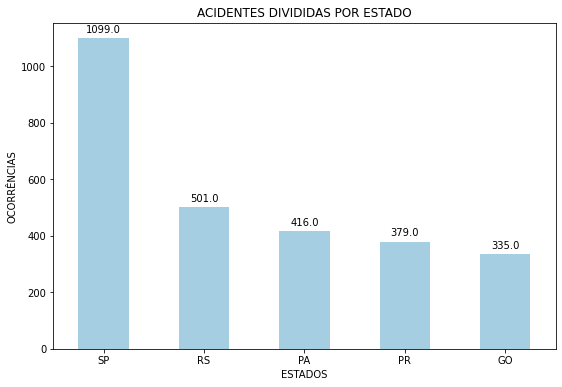

In [31]:
ax =  ocor_acidente['ocorrencia_uf'].value_counts().head(5).plot(kind = 'bar', figsize=(9, 6), colormap='Paired')
ax.set_title('ACIDENTES DIVIDIDAS POR ESTADO')
ax.set_xlabel('ESTADOS')
ax.set_ylabel('OCORRÊNCIAS')
ax.tick_params(axis='x', rotation=0)
show_count()

## Nessa análise podemos observar a quantidade de **Acidentes** agrupada por estado dentro do Brasil.Devido ao fato de São Paulo possuir o maior número de vôos (sejam particulares ou regulares), não é surpresa que temos também o maior número ocorrências registrado, sendo esse levemente maior que o dobro do segundo colocado - Rio Grande do Sul. O número de acidentes em SP ocupa 91%~ de todas as ocorrências registradas no estado.

## Como tem sido o histórico das ocorrências ao longo do período de 2012 à 2021? As ocorrências aumentaram?

<function __main__.show_count>

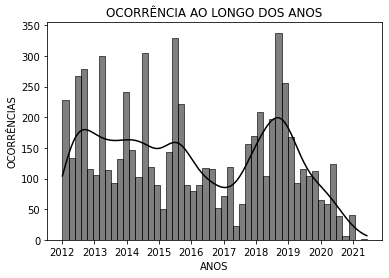

In [32]:
ax = sns.histplot(data = df, x = 'ocorrencia_dia', kde = True, color = 'black', bins = 50)
ax.set_title('OCORRÊNCIA AO LONGO DOS ANOS')
ax.set_xlabel('ANOS')
ax.set_ylabel('OCORRÊNCIAS')
show_count

 De acordo com o gráfico, temos uma variância equilibrada (representada pela curva de densidade **preta**) até metade de 2016, onde temos um registro menor que permanece até o começo de 2018. Novamente temos esse declínio no início de 2020, ano no qual se inicia a pandemia mundial.

## Quais tipos de aeronaves apresentam o maior número de ocorrências?


In [33]:
order = df['aeronave_tipo_veiculo'].value_counts(ascending = False)
order

AVIÃO          4997
HELICÓPTERO    1449
ULTRALEVE       107
PLANADOR         74
***              37
ANFÍBIO          21
Name: aeronave_tipo_veiculo, dtype: int64

Text(0, 0.5, 'TIPO DE AERONAVE')

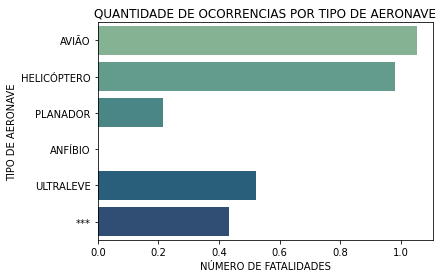

In [34]:
ax = sns.barplot(data = df, x = 'aeronave_fatalidades_total', y = 'aeronave_tipo_veiculo', palette = 'crest', ci = None)
ax.set_title('QUANTIDADE DE OCORRENCIAS POR TIPO DE AERONAVE')
ax.set_xlabel('NÚMERO DE FATALIDADES')
ax.set_ylabel("TIPO DE AERONAVE")

In [35]:
order_sum = order.sum()
total = ((order[0])/order_sum)
print(f'{total.round(2)} das ocorrências ocorrem em aviões')



0.75 das ocorrências ocorrem em aviões


### O avião sem dúvidas ocupa o primeiro lugar quando tratamos de ocorrências. O mesmo representa em torno de 75% dos registros em relação aos tipos de aeronave.

## E quais tipos de Motores apresentam mais falhas?

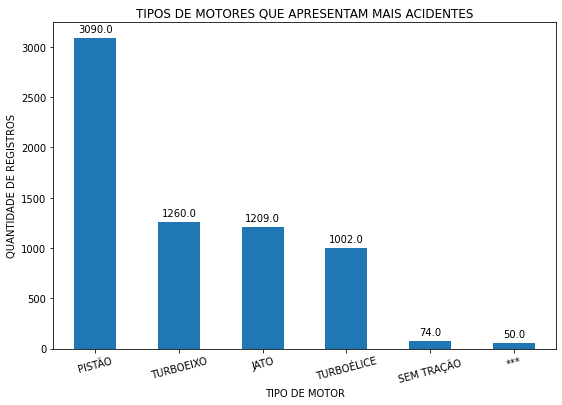

In [36]:
ax = df['aeronave_motor_tipo'].value_counts().plot(kind='bar', figsize=(9, 6))
ax.set_title('TIPOS DE MOTORES QUE APRESENTAM MAIS ACIDENTES')
ax.set_xlabel('TIPO DE MOTOR')
ax.set_ylabel('QUANTIDADE DE REGISTROS')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)
show_count()

### Acima podemos ver que o motor que possui o maior registro de problemas é o **Pistão** seguido por **Turboeixo** e à **Jato**, que apresentam volumes de falhas semelhantes. Em quarto lugar temos o **Turboélice** fechando o grupo dos motores que apresentam o maior número de falhas.

## Quais tipos de viagem apresentam maior histórico de ocorrências? voos ‘regulares’ x voos privados

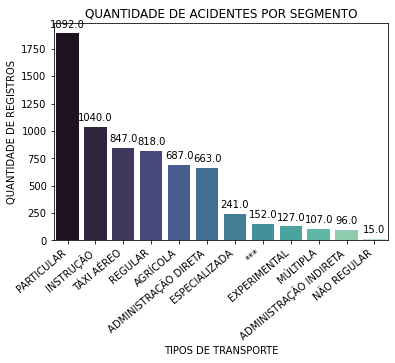

In [37]:
ax = sns.countplot(data = df, x = 'aeronave_registro_segmento', order = df['aeronave_registro_segmento'].value_counts().index, palette = 'mako')
ax.set_title('QUANTIDADE DE ACIDENTES POR SEGMENTO')
ax.set_xlabel('TIPOS DE TRANSPORTE')
ax.set_ylabel('QUANTIDADE DE REGISTROS')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'right')
show_count()

### Por mais que os vôos particulares não sejam acessíveis à maioria da população, estes ainda representam o maior volume de ocorrências em geral. Os vôos regulares (ofertados pelas companhias aéreas), mesmo sendo mais populares e em maior quantidade, se enquadram apenas em quarto lugar. Isso mostra o quanto os vôos regulares são relativamente seguros em relação aos concorrentes. 

## Quais são os tipos de status de recomendações e seus volumes? O numero de ocorrencias 'Não Cumpridas' aumenta ou reduz ao passar dos anos?

Text(0, 0.5, 'QUANTIDADE')

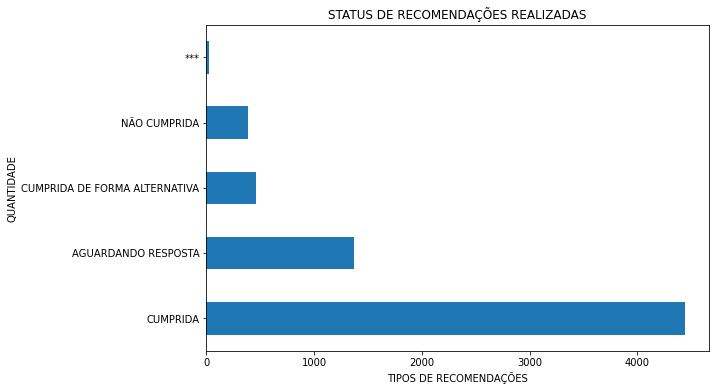

In [38]:
ax = df['recomendacao_status'].value_counts().plot(kind='barh', figsize=(9, 6))
ax.set_title('STATUS DE RECOMENDAÇÕES REALIZADAS')
ax.set_xlabel('TIPOS DE RECOMENDAÇÕES')
ax.set_ylabel("QUANTIDADE")

### Totalizam-se cinco tipos de status - **CUMPRIDA**, **NÃO CUMPRIDA**, **CUMPRIDA DE FORMA ALTERNATIVA**, **AGUARDANDO RESPOSTA** e *** (essa última configurando dados não fornecidos).
### Podemos perceber que a quantidade de recomendações **Não Cumpridas** representa o menor valor no gráfico, enquanto as recomendações **Cumpridas** tomam grande fatia do total. 

Text(0, 0.5, 'QUANTIDADE DE OCORRENCIAS ')

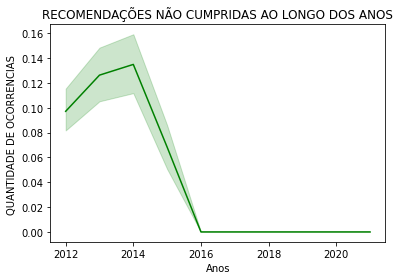

In [39]:
cumprida = df['recomendacao_status'] == 'NÃO CUMPRIDA'

ax = sns.lineplot(data = df, x = 'ocorrencia_ano', y = cumprida, color = 'green')
ax.set_title('RECOMENDAÇÕES NÃO CUMPRIDAS AO LONGO DOS ANOS')
ax.set_xlabel('Anos')
ax.set_ylabel("QUANTIDADE DE OCORRENCIAS ")


### Somando-se o fato de termos a grande maioria das recomendações **Cumpridas** e como menor valor as **Não Cumpridas**, não é nenhuma surpresa o resultado que obtemos em relação às ocorrências ao longo dos anos. Temos um declínio considerável ao decorrer do período. Percebe- que a segurança é levada cada vez mais em conta, essa podendo ser atribuída ao comportamento positivo em relação ao cumprimento das recomendações após as ocorrências.

## Quantas fatalidades ocorreram durante o período de 2012 à 2021? Esse número se manteve constante ao longo do anos?

### Primeiro vamos analisar o número de fatalidades ocorridos ano ao ano para termos uma noção do cenário

In [40]:
fatal_ano = df.groupby('ocorrencia_ano')['aeronave_fatalidades_total'].sum()
fatal_ano = fatal_ano.to_frame().reset_index()
fatal_ano

,ocorrencia_ano,aeronave_fatalidades_total
0,2012,1418
1,2013,1316
2,2014,1859
3,2015,834
4,2016,284
5,2017,320
6,2018,306
7,2019,353
8,2020,77
9,2021,2


Text(0, 0.5, 'FATALIDADES')

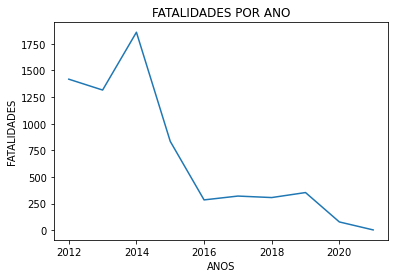

In [41]:
ax = sns.lineplot(data = fatal_ano, x = 'ocorrencia_ano', y = 'aeronave_fatalidades_total')
ax.set_title('FATALIDADES POR ANO')
ax.set_xlabel('ANOS')
ax.set_ylabel("FATALIDADES")


### Através do gráfico podemos concluir que com o passar do anos o número de fatalidades foi se reduzindo drasticamente. Diversos fatores podem justificar esse comportamento como diminuições da quantidade de vôos no fim do período e tanto empresas como funcionários seguirem as recomendações emitidas após as ocorrências.

# Conclusão


### Após análise realizada em cima da base de dados da CENIPA, conseguiremos obter diversos insights e respostas referentes aos acidentes/incidentes aéreos ocorrido durante o período de 2012 à 2021.
### Mesmo existindo uma quantidade enorme de registros de acidentes, o avião ainda se mostra como um meio de transporte seguro. Ao passar dos anos as empresas adotaram medidas prescritivas junto ao apoio de instituições como ANAC para evitar que esses acontecimentos continuem se repetindo ao longo dos anos.
### Vale ressaltar que tanto as máquinas quanto os seres humanos continuarão sujeitos à falhas e erros, porém ao passar do tempo pode-se comprovar que podemos reduzir (e bastante) o número de fatalidades através de análises prescritivas e posteriormente prescritivas.



---



# MACHINE LEARNING - ESCOLHA DO MELHOR MODELO 

### Com base em todas as informações reunidas e insights gerados, iremos produzir um modelo de machine learning para realizarmos a predição de ocorrências - **Acidentes**, **Incidentes e **Incidentes Grave** através de um modelo de **Regressão**.
### Para podermos prosseguir, é necessário que a base de dados seja dividida entre treino e test, para que possamos aplicar o modelo em uma parte da base e consequentemente testarmos o modelo na parte 'desconhecida', verificando o real desempenho do modelo.

[Text(0.5, 0, 'codigo_ocorrencia'),
 Text(1.5, 0, 'total_recomendacoes'),
 Text(2.5, 0, 'total_aeronaves_envolvidas'),
 Text(3.5, 0, 'aeronave_pmd'),
 Text(4.5, 0, 'aeronave_fatalidades_total'),
 Text(5.5, 0, 'ocorrencia_ano')]

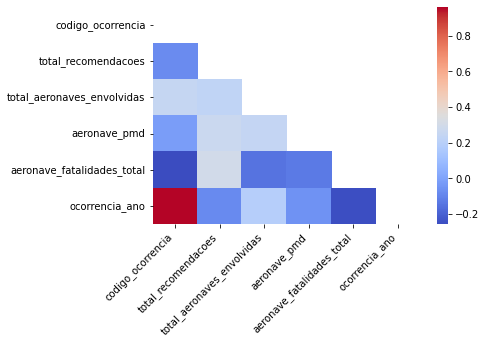

In [42]:
# Gerando um plot de Heatmap sem mostrar informações redundantes
corr = df.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
hmap = sns.heatmap(corr, mask = mask, cmap="coolwarm")
hmap.set_xticklabels(
    hmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [43]:
!pip install pycaret 
!pip install markupsafe==2.0.1 
!pip install pyyaml==5.4.1 -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from pycaret.utils import enable_colab
enable_colab()
from pycaret.regression import *


Colab mode enabled.


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [45]:
ml = df.drop(['ocorrencia_hora', 'ocorrencia_ano'], axis = 1)
ml

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_dia,investigacao_status,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,recomendacao_numero,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario
0,45331,ACIDENTE,GUARULHOS,SP,BRASIL,2012-06-01,FINALIZADA,3,1,NÃO,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,TURBOÉLICE,BIMOTOR,18600,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR,A-582/CENIPA/2014 - 01,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,45331,ACIDENTE,GUARULHOS,SP,BRASIL,2012-06-01,FINALIZADA,3,1,NÃO,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,TURBOÉLICE,BIMOTOR,18600,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR,A-582/CENIPA/2014 - 02,Atuar junto à Administração do Aeroporto Inter...,CUMPRIDA,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,45331,ACIDENTE,GUARULHOS,SP,BRASIL,2012-06-01,FINALIZADA,3,1,NÃO,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,TURBOÉLICE,BIMOTOR,18600,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR,A-582/CENIPA/2014 - 03,Orientar as suas organizações subordinadas em ...,AGUARDANDO RESPOSTA,DEPARTAMENTO DE CONTROLE DE ESPAÇO AÉREO
3,45331,ACIDENTE,GUARULHOS,SP,BRASIL,2012-06-01,FINALIZADA,3,1,NÃO,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,TURBOÉLICE,BIMOTOR,18600,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR,A-582/CENIPA/2014 - 01,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,45331,ACIDENTE,GUARULHOS,SP,BRASIL,2012-06-01,FINALIZADA,3,1,NÃO,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,TURBOÉLICE,BIMOTOR,18600,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR,A-582/CENIPA/2014 - 02,Atuar junto à Administração do Aeroporto Inter...,CUMPRIDA,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6682,79713,ACIDENTE,SANTA VITÓRIA DO PALMAR,RS,BRASIL,2020-06-12,FINALIZADA,3,1,NÃO,AVIÃO,EMBRAER,EMB-202,PISTÃO,MONOMOTOR,1800,BRASIL,AVIÃO,AGRÍCOLA,PISTA PLÁ E SILVA,PISTA PLÁ E SILVA,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL,A-146/CENIPA/2020 - 01,Atuar junto à empresa Plá e Silva Aviação Agrí...,AGUARDANDO RESPOSTA,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
6683,79713,ACIDENTE,SANTA VITÓRIA DO PALMAR,RS,BRASIL,2020-06-12,FINALIZADA,3,1,NÃO,AVIÃO,EMBRAER,EMB-202,PISTÃO,MONOMOTOR,1800,BRASIL,AVIÃO,AGRÍCOLA,PISTA PLÁ E SILVA,PISTA PLÁ E SILVA,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL,A-146/CENIPA/2

In [46]:
s = setup(data = df,
          target = 'aeronave_fatalidades_total',
          session_id = 111,
          normalize = True,
          remove_multicollinearity = True, 
          multicollinearity_threshold = 0.95
)
                    

,Description,Value
0,session_id,111
1,Target,aeronave_fatalidades_total
2,Original Data,"(6685, 38)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,33
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4679, 1596)"


### Agora iremos comparar todos os modelos disponibilizados pela biblioteca Pycaret, rankeando pela métrica RMSE - "Raíz Quadrada do Erro Médio". Neste caso, quanto menor o valor e/ ou mais próximo de "zero", melhor o modelo irá performar em relação à base de dados.

In [47]:
best = compare_models(n_select = 5, sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0034,0.0047,0.0583,0.9988,0.0353,0.0047,0.198
et,Extra Trees Regressor,0.0033,0.0067,0.0584,0.9983,0.0312,0.0037,12.229
rf,Random Forest Regressor,0.0117,0.0079,0.0832,0.9979,0.0480,0.0128,11.043
lightgbm,Light Gradient Boosting Machine,0.0443,0.0150,0.1197,0.9960,0.0745,0.0362,0.196
br,Bayesian Ridge,0.0193,0.0208,0.1372,0.9945,0.0863,0.0035,33.641
lr,Linear Regression,0.0192,0.0210,0.1380,0.9944,0.0865,0.0034,0.802
par,Passive Aggressive Regressor,0.0877,0.0269,0.1604,0.9928,0.1137,0.0384,0.335
ridge,Ridge Regression,0.0760,0.0292,0.1675,0.9923,0.1127,0.0384,0.128
omp,Orthogonal Matching Pursuit,0.0419,0.0543,0.2165,0.9858,0.1052,0.0219,0.128
knn,K Neighbors Regressor,0.0520,0.0749,0.2650,0.9811,0.1286,0.0456,0.897


### Como podemos observar acima, o modelo DT (Árvore de Decisão) apresenta tanto o menor RMSE quanto MAE. Ressalto que também temos um ecelente desempenho em termos de perfomance/processamento em relação a esse modelo, levando apenas 0.2 segundo para sua execução.
### Vamos agora criar o modelo campeão, com base nos resultados obtidos:

In [48]:
model = create_model('dt', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0053,0.0075,0.0865,0.9978,0.0532,0.0034
1,0.0011,0.0011,0.0327,0.9998,0.0227,0.0000
2,0.0096,0.0160,0.1266,0.9964,0.0621,0.0196
3,0.0128,0.0385,0.1961,0.9895,0.0871,0.0035
4,0.0075,0.0075,0.0865,0.9979,0.0524,0.0120
Mean,0.0073,0.0141,0.1057,0.9963,0.0555,0.0077
Std,0.0040,0.0131,0.0542,0.0036,0.0207,0.0071


### Após gerarmos o modelo, é hora de fazer um ajuste fino, também conhecido como tunagem de hiper-parâmetros.

In [49]:
tuned_dt = tune_model(model, fold = 10, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1986,0.1914,0.4375,0.9458,0.1777,0.2847
1,0.1909,0.1884,0.4340,0.9411,0.1850,0.2479
2,0.1934,0.2209,0.4700,0.9452,0.1969,0.2473
3,0.1787,0.1289,0.3590,0.9718,0.1634,0.2109
4,0.1691,0.1167,0.3416,0.9745,0.1505,0.2072
5,0.1913,0.1970,0.4439,0.9543,0.2018,0.2322
6,0.1920,0.1821,0.4267,0.9503,0.2038,0.2189
7,0.1513,0.1235,0.3514,0.9661,0.2088,0.2531
8,0.1968,0.1558,0.3948,0.9564,0.1796,0.2535


### Percebe-se que a tunagem performou de forma negativa, aumentando o valor do RMSE em quase dez vezes. As outras métricas também apresentaram aumento considerável no valor, o que nos leva a manter o modelo em sua forma anterior.

In [50]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [51]:
mf_predict = predict_model(model, data = df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.0007,0.0007,0.0273,0.9998,0.019,0.0


In [52]:
final = finalize_model(model)

In [53]:
saved = save_model(final, 'model')

Transformation Pipeline and Model Successfully Saved
